In [19]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
#labels
labeldict = {
0 : "Bring",
1 : "Clean Floor",
2 : "Clean Surface",
4 : "Close Door",
5 : "Close Drawer",
6 : "Close Lid By Rotate",
7 : "Close Other Lid",
8 : "Close Small Box",
9 : "Close Tap Water",
10 : "Drink",
11 : "Dry Off Hands",
12 : "Dry Off Hands By Shake",
13 : "Eat Small",
14 : "Gargle",
15 : "Getting Up",
16 : "Hang",
17 : "Lying Down",
18 : "Open Bag",
19 : "Open Big Box",
20 : "Open Door",
21 : "Open Drawer",
22 : "Open Lid By Rotate",
23 : "Open Other Lid",
24 : "Open Small Box",
25 : "Open Tap Water",
26 : "Plug In",
27 : "Press by Grasp",
28 : "Press From Top",
29 : "Press Switch",
30 : "Put From Bottle",
31 : "Put From Tap Water",
32 : "Put High Position",
33 : "Put On Floor",
34 : "Read",
35 : "Rotate",
36 : "Rub Hands",
37 : "Scoop And Put",
38 : "Sitting Down",
39 : "Squatting Down",
40 : "Standing Up",
41 : "Stand Up From Squatting",
42 : "Take From Floor",
43 : "Take From High Position",
44 : "Take Off Jacket",
45 : "Take Out",
46 : "Talk By Telephone",
47 : "Throw Out",
48 : "Throw Out Water",
49 : "Touch Smartphone Screen",
50 : "Type",
51 : "Unhang",
52 : "Unplug",
53 : "Wear Jacket",
54 : "Write"
}

#load data
#training
train_acc = np.load('../data/training/trainAccelerometer.npy')
train_gra = np.load('../data/training/trainGravity.npy')
train_gyr = np.load('../data/training/trainGyroscope.npy')
train_lin = np.load('../data/training/trainLinearAcceleration.npy')

train_mag = np.load('../data/training/trainMagnetometer.npy') #load 800 Hz version

trainJins_acc = np.load('../data/training/trainJinsAccelerometer800.npy')
trainJins_gyr = np.load('../data/training/trainJinsGyroscope800.npy')

trainMS_acc = np.load('../data/training/trainMSAccelerometer800.npy')
trainMS_gyr = np.load('../data/training/trainMSGyroscope800.npy')

train_label = np.load('../data/training/trainLabels.npy')

#train_data = [train_acc, train_gra, train_gyr, train_lin, train_mag, trainJins_acc, trainJins_gyr, trainMS_acc, trainMS_gyr]

test_acc = np.load('../data/testing/testAccelerometer.npy')
test_gra = np.load('../data/testing/testGravity.npy')
test_gyr = np.load('../data/testing/testGyroscope.npy')
test_mag = np.load('../data/testing/testMagnetometer.npy') #load 800 Hz version
test_lin = np.load('../data/testing/testLinearAcceleration.npy')

testJins_acc = np.load('../data/testing/testJinsAccelerometer800.npy')
testJins_gyr = np.load('../data/testing/testJinsGyroscope800.npy')

testMS_acc = np.load('../data/testing/testMSAccelerometer800.npy')
testMS_gyr = np.load('../data/testing/testMSGyroscope800.npy')

test_label = np.load('../data/testing/testLabels.npy')

#test_data = [test_acc, test_gra, test_gyr, test_lin, test_mag, testJins_acc, testJins_gyr, testMS_acc, testMS_gyr]

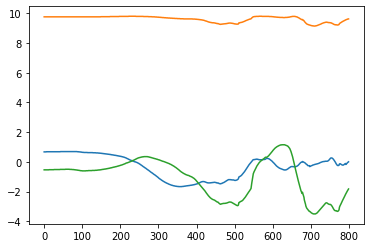

Bring


In [15]:
n = 0
plt.plot(train_gra[n])
plt.show()
print(labeldict[n])

In [3]:
#create input feature vector

#train vector
train_data = [train_gyr, train_lin, trainJins_acc, trainJins_gyr, trainMS_acc, trainMS_gyr] #add train_mag

train_features = np.append(train_acc, train_gra, axis=2)
for i in train_data:
    train_features = np.append(train_features, i, axis=2)

print(train_features.shape)
#print(train_features)


#test vector
test_data = [ test_gyr, test_lin, testJins_acc, testJins_gyr, testMS_acc, testMS_gyr] # add test_mag
test_features = np.append(test_acc, test_gra, axis =2)
for i in test_data:
    test_features = np.append(test_features, i, axis=2)

print(test_features.shape)
print(test_features.dtype)
#print(test_features[0])

(2284, 800, 24)
(2288, 800, 24)
float32


In [16]:
df = pd.DataFrame(train_features[0], columns=['train_gyr_X', 'train_gyr_Y', 'train_gyr_Z', 'train_lin_X', 'train_lin_Y', 'train_lin_Z', 'trainJins_acc_X', 'trainJins_acc_Y', 'trainJins_acc_Z', 'trainJins_gyr_X', 'trainJins_gyr_Y', 'trainJins_gyr_Z', 'trainMS_acc_X', 'trainMS_acc_Y', 'trainMS_acc_Z', 'trainMS_gyr_X', 'trainMS_gyr_Y', 'trainMS_gyr_Z', 'train_acc_X', 'train_acc_Y', 'train_acc_Z', 'train_gra_X', 'train_gra_Y', 'train_gra_Z'])
df

,train_gyr_X,train_gyr_Y,train_gyr_Z,train_lin_X,train_lin_Y,train_lin_Z,trainJins_acc_X,trainJins_acc_Y,trainJins_acc_Z,trainJins_gyr_X,...,trainMS_acc_Z,trainMS_gyr_X,trainMS_gyr_Y,trainMS_gyr_Z,train_acc_X,train_acc_Y,train_acc_Z,train_gra_X,train_gra_Y,train_gra_Z
0,0.742456,10.705738,-0.332908,0.67,9.770000,-0.54,0.004261,0.064981,0.007457,0.11,...,-15.000000,-5.479999,16.370005,323.590057,0.941162,0.353760,-0.001709,1.554873,2.804877,2.500001
1,0.744851,10.787169,-0.323328,0.67,9.770000,-0.54,-0.006392,0.064981,-0.002131,0.19,...,-15.074638,-6.090080,16.622585,328.405823,0.943915,0.358661,-0.004277,-3.399950,4.501787,-4.175635
2,0.708926,10.674603,-0.335303,0.67,9.770000,-0.54,-0.007457,0.055394,0.006392,0.14,...,-15.110654,-6.532887,16.808540,331.854431,0.942545,0.357785,-0.003434,-2.206871,4.101925,-2.553009
3,0.783171,10.710527,-0.354463,0.67,9.770000,-0.54,-0.008522,0.055394,0.001065,0.08,...,-15.117230,-6.807700,16.927746,333.941620,0.939655,0.354693,-0.000939,1.641456,2.816904,2.667164
4,0.821492,10.720108,-0.361648,0.67,9.770000,-0.54,-0.010653,0.054328,0.004261,0.07,...,-15.103872,-6.923425,16.983826,334.747559,0.937353,0.352991,0.000904,4.225230,2.000713,6.104101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.675396,10.415940,-1.791475,-0.10,9.599999,-2.00,-0.834102,0.628506,-0.176834,-0.68,...,-13.866300,-0.609094,14.369817,284.004089,0.894643,0.297990,-0.009726,48.377228,-9.720260,42.677364
796,0.953218,10.679393,-1.714834,-0.07,9.610000,-1.96,-0.805340,0.651942,-0.170442,-0.55,...,-14.195652,-1.719817,14.827453,293.191650,0.899696,0.301950,0.001951,46.681965,-10.874252,50.363552
797,0.960403,10.962005,-1.899251,-0.04,9.620000,-1.92,-0.761664,0.666856,-0.159790,-0.54,...,-14.477255,-2.800665,15.271029,302.035461,0.908770,0.311820,0.008499,39.782806,-9.582352,48.107517
798,1.060994,10.954820,-2.052532,-0.02,9.630000,-1.88,-0.723315,0.694552,-0.154463,-0.61,...,-14.705420,-3.810559,15.684772,310.222351,0.921042,0.326576,0.008371,27.416260,-5.855100,35.381554


In [23]:
train_data = torch.tensor(train_data)
test_data = torch.tensor(test_data)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

C:\Users\nils0\AppData\Local\Temp/ipykernel_15200/2850858831.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = torch.tensor(train_data)


ValueError: too many values to unpack (expected 2)

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)